# Лабораторная работа №3. <br> Линейный дискриминантный анализ

Выполнила: Кузнецова Екатерина

## 1. Цель работы

Получить практические навыки работы с методом дискриминантного анализа и визуализацией данных на практических примерах с использованием языка программирования python.

## 2. Постановка задачи

1. Прочитать теоретическую часть
2. Описать структуру исходных данных для своего набора:<br>
	a. общие характеристики массива данных: предметная область, количество записей<br>
	b. входные параметры: названия и типы<br>
	c. выходной класс: название и значения
3. Осуществить визуализацию двух любых признаков и посчитать коэффициент корреляции между ними
4. Выполнить разбиение классов набора данных с помощью LDA (LinearDiscriminantAnalysis). Осуществить визуализацию разбиения
5. Осуществить классификацию с помощью методов LDA и QDA (LinearDiscriminantAnalysis и QuadraticDiscriminantAnalysis). Сравнить полученные результаты

## 3. Исходные данные

Датасет: http://archive.ics.uci.edu/ml/datasets/Zoo<br>
Предметная область: обитатели зоопарка<br>
Задача: определить, к какому из 7ми типов относится каждое животное

Количество записей: 101<br>
Количество атрибутов: 17


Атрибуты:

1. Название животного (строка, уникальный для каждого экземпляра)
2. Наличие волос (логический тип)
3. Наличие перьев (логический тип)
4. Яйца (логический тип)
5. Млекопитающий (логический тип)
6. Умеет летать (логический тип)
7. Водный (логический тип)
8. Хищник (логический тип)
9. Наличие зубов (логический тип) 
10. Наличие позвоночника (логический тип)
11. Дышит воздухом (логический тип)
12. Ядовитость (логический тип)
13. Наличие плавников (логический тип)
14. Количество ног (набор целочисленных значений: {0,2,4,5,6,8})
15. Наличие хвоста (логический тип)
16. Является домашним (логический тип)
17. Catsize (логический тип)
18. Тип (целочисленные значения в диапазоне [1,7])

## 4. Ход работы

Загружаем датасет и делим его на 2 части: animal_attr, где хранятся значения атрибутов каждого объекта, animal_class - массив классов, к которым принадлежат эти объекты. Далее разбиваем выборку на тестовую и обучающую

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("zoo.data.csv", header=None).values
animal_attr = dataset[:, 1:-1]  # список атрибутов (признаков) для каждого животного
animal_class = dataset[:, -1]  # классы животных
animal_class = animal_class.astype(np.int64, copy=False)
data_train, data_test, class_train, class_test = train_test_split(animal_attr, animal_class, 
                                                                  test_size=0.3,
                                                                  random_state=123)

Для осуществления визуализации признаков нам потребуется библиотека matplotlib.pyplot и функция, которая будет вычислять коэффициент корреляции Пирсона между ними.

In [9]:
from math import sqrt

# функция для вычисления среднего значения
def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

# функция для вычисления коэффициента Пирсона
def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff ** 2
        ydiff2 += ydiff ** 2
    # если знаменатель равен 0
    if xdiff2 == 0:
        xdiff2 += 0.0000001 # эпсилон
    if ydiff2 == 0:
        ydiff2 += 0.0000001 # эпсилон

    return diffprod / sqrt(xdiff2 * ydiff2)

Визуализировать будем признаки airborne и breathes.

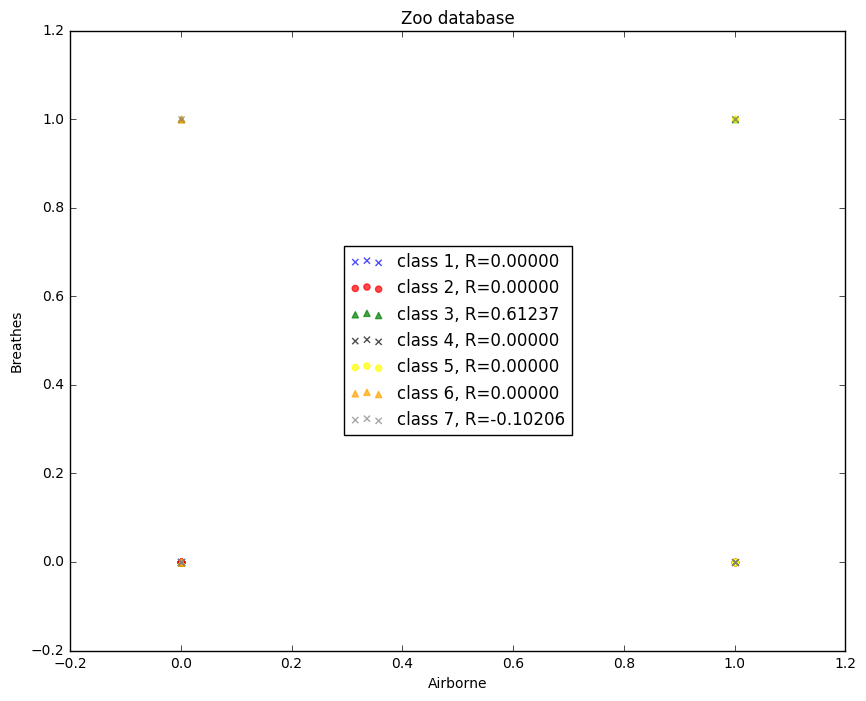

In [10]:
from matplotlib import pyplot as plt 
 
# настройки визуализации
plt.figure(figsize=(10, 8))
plt.title('Zoo database')
plt.xlabel('Airborne')
plt.ylabel('Breathes')

# визуализация 2х признаков
for label, marker, color in zip(range(1, 8), ('x', 'o', '^', 'x', 'o', '^', 'x'),
                                ('blue', 'red', 'green', 'black', 'yellow', 'orange', 'grey')):
    # выбираем признаки airborne и breathes для визуализации
    # вычисляем для каждого класса коэффициент корреляции Пирсона для его признаков
    pearson_coef = pearson_def(animal_attr[:, 5][animal_class == label], animal_attr[:, 10][animal_class == label])
    plt.scatter(x=animal_attr[:, 5][animal_class == label],
                y=animal_attr[:, 10][animal_class == label],
                marker=marker,
                color=color,
                alpha=0.7,
                label='class {0:}, R={1:.5f}'.format(label, pearson_coef)
                )
plt.legend(loc='center')
plt.show()

Вычислим для них коэффициент Пирсона.

In [12]:
pearson_def(animal_attr[:, 5], animal_attr[:, 10])

0.08791512395140887

Выполняем разбиение классов набора данных с помощью Линейного дискриминантного анализа и визуализируем его.

C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


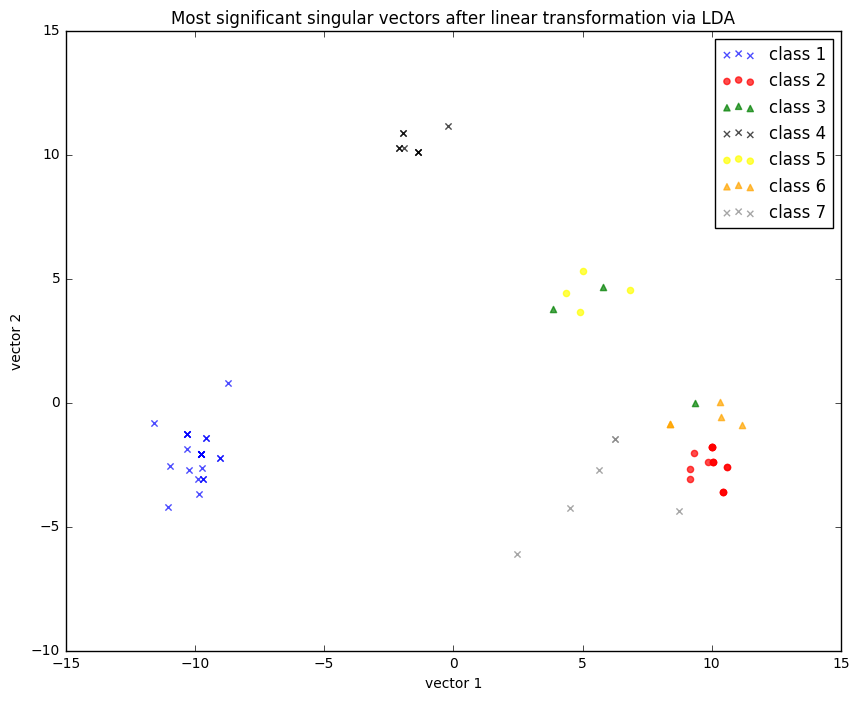

In [13]:
# разбиение классов набора данных с помощью LDA
sklearn_lda = LDA(n_components=2)
sklearn_data = sklearn_lda.fit_transform(data_train, class_train)

# Визуализация разбиения классов после линейного преобразования LDA
plt.figure(figsize=(10, 8))
plt.xlabel('vector 1')
plt.ylabel('vector 2')
plt.title('Most significant singular vectors after linear transformation via LDA')

for label, marker, color in zip(range(1, 8), ('x', 'o', '^', 'x', 'o', '^', 'x'),
                                ('blue', 'red', 'green', 'black', 'yellow', 'orange', 'grey')):
    plt.scatter(x=sklearn_data[:, 0][class_train == label],
                y=sklearn_data[:, 1][class_train == label],
                marker=marker,
                color=color,
                alpha=0.7,
                label='class {}'.format(label)
                )

plt.legend()
plt.show()

Классифицируем данные с помощью методов LDA и QDA

In [20]:
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

for clf in [LDA(), QDA()]:
    clf.fit(data_train, class_train)
    pred_train = clf.predict(data_train)
    pred_test = clf.predict(data_test)
    print(clf, '\n')
    print('Точность классификации на обучающем наборе {:.2%}'.format(metrics.accuracy_score(class_train, pred_train)))
    print('Точность классификации на тестовом наборе {:.2%}\n'.format(metrics.accuracy_score(class_test, pred_test)))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 

Точность классификации на обучающем наборе 97.14%
Точность классификации на тестовом наборе 87.10%

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001) 

Точность классификации на обучающем наборе 22.86%
Точность классификации на тестовом наборе 12.90%



C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## 5. Заключение

В ходе лабораторной работы были визуализированы признаки airborne и breathes датасета "Зоопарк" и посчитан коэффициент корреляции Пирсона между ними. Также было выполнено разбиение классов набора данных с помощью линейного дискриминантного анализа и осуществлена визуализация этого разбиения.
При классификации с помощью методов LinearDiscriminantAnalysis и QuadraticDiscriminantAnalysis лучшие результаты продемонстрировал LDA. Низкие показатели точности QDA скорее всего связаны с характером и структурой данных в датасете.